In [1]:
from conphar.Pharmacophores import parse_json_pharmacophore, show_pharmacophoric_descriptors, save_pharmacophore_to_pymol, save_pharmacophore_to_json, compute_concensus_pharmacophore, get_ligand_receptor_pharmacophore
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.environ["LC_ALL"] = "C"
os.environ["LANG"] = "C"

ConPhar tools imported successfully


Next cell only works on Linux machines

In [ ]:
receptor_path = "..Data/PDB structures prepared/AF-Q13705-ACVR2B_-_prepared.pdb"  # update with your actual receptor file

for file in os.listdir("../Data/SDF poses/"):
    if file.endswith(".sdf"):
        ligand_path = f"../Data/SDF poses/{file}"
        output_name = os.path.splitext(file)[0]
        out_path = f"../Data/pharmacophores/{output_name}"
        get_ligand_receptor_pharmacophore(receptor=receptor_path, ligand=ligand_path, out=out_path)

From here it works on all machines

In [2]:
t,l,r=parse_json_pharmacophore("../Data/pharmacophores/CUIHSIWYWATEQL-UHFFFAOYSA-N_-9.462.json")
t

,enabled,name,radius,size,svector,vector,x,y,z,color
0,True,Aromatic,1.10,6,"{'x': 0.8370344019368281, 'y': -0.513799962652...","[{'x': 0.8370344019368281, 'y': -0.51379996265...",-0.888167,5.274667,-8.530000,purple
1,True,Aromatic,1.10,6,"{'x': -0.06577936815703536, 'y': -0.6122213380...","[{'x': -0.06577936815703536, 'y': -0.612221338...",-6.071000,0.290167,-12.609000,purple
2,True,Aromatic,1.10,5,"{'x': -0.0685429356096098, 'y': -0.61185634264...","[{'x': -0.0685429356096098, 'y': -0.6118563426...",-7.856800,1.306000,-11.971200,purple
3,True,HydrogenDonor,0.50,1,"{'x': -0.9138877261592397, 'y': -0.08918316740...","[{'x': -0.9138877261592397, 'y': -0.0891831674...",-2.392000,2.958000,-8.976000,white
4,True,HydrogenDonor,0.50,1,"{'x': 0.1227827755932122, 'y': -0.698917337992...","[{'x': 0.1227827755932122, 'y': -0.69891733799...",1.179000,4.782000,-5.007000,white
5,True,HydrogenAcceptor,0.50,1,"{'x': 0.6039800370811819, 'y': 0.3505993117657...","[{'x': 0.603980037081182, 'y': 0.3505993117657...",-0.710000,1.365000,-9.644000,orange
6,True,HydrogenAcceptor,0.50,1,"{'x': 0.2713862153877971, 'y': 0.7483075791942...","[{'x': 0.271386215387797, 'y': 0.7483075791942...",-7.540000,2.140000,-11.296000,orange
7,True,HydrogenAcceptor,0.50,1,"{'x': 0.1227827755932122, 'y': -0.698917337992...","[{'x': 0.1227827755932122, 'y': -0.69891733799...",1.179000,4.782000,-5.007000,orange
8,True,HydrogenAcceptor,0.50,1,"{'x': 0.5809683964340242, 'y': 0.8096544773966...","[{'x': 0.5809683964340243, 'y': 0.809654477396...",1.099000,7.265000,-5.822000,orange
9,True,HydrogenAcceptor,0.50,1,"{'x': -0.7437071414943055, 'y': 0.250330631776...","[{'x': -0.7437071414943054, 'y': 0.25033063177...",-0.903000,6.418000,-4.760000,orange


In [3]:
p4_table=pd.DataFrame()
for file in os.listdir('../Data/pharmacophores'):
    if '.json' in file:
        try:
            p4,lig,rec=parse_json_pharmacophore(f"../Data/pharmacophores/{file}")
            p4['ligand']=file.replace('.json','')
            p4_table=pd.concat([p4_table,p4],ignore_index=True)
        except Exception:
            pass

In [4]:
# rename colors
p4_table['color'] = p4_table['color'].replace({
    'navy': 'blue',
    'white': 'yellow',
})
p4_table

,enabled,name,radius,size,svector,vector,x,y,z,color,ligand
0,True,Aromatic,1.10,6,"{'x': -0.05792271974805462, 'y': 0.68046177829...","[{'x': -0.05792271974805462, 'y': 0.6804617782...",-7.198500,1.592333,-11.000667,purple,UIARLYUEJFELEN-UHFFFAOYSA-N_-6.962
1,True,Aromatic,1.10,6,"{'x': -0.04800029890067767, 'y': 0.67334105204...","[{'x': -0.04800029890067767, 'y': 0.6733410520...",-3.483000,0.546000,-12.247000,purple,UIARLYUEJFELEN-UHFFFAOYSA-N_-6.962
2,True,Aromatic,1.10,6,"{'x': -0.02617094090083919, 'y': 0.67504754663...","[{'x': -0.02617094090083919, 'y': 0.6750475466...",0.610167,0.909667,-12.119000,purple,UIARLYUEJFELEN-UHFFFAOYSA-N_-6.962
3,True,Aromatic,1.10,5,"{'x': -0.05768152333257324, 'y': 0.68054936125...","[{'x': -0.05768152333257324, 'y': 0.6805493612...",-5.115600,1.481000,-11.269400,purple,UIARLYUEJFELEN-UHFFFAOYSA-N_-6.962
4,True,Aromatic,1.10,5,"{'x': -0.03646868531663154, 'y': 0.67547898111...","[{'x': -0.03646868531663154, 'y': 0.6754789811...",-1.480000,1.210200,-11.757400,purple,UIARLYUEJFELEN-UHFFFAOYSA-N_-6.962
...,...,...,...,...,...,...,...,...,...,...,...
181,True,HydrogenAcceptor,0.50,1,"{'x': -0.5183513242711765, 'y': 0.847101614703...","[{'x': -0.5183513242711764, 'y': 0.84710161470...",-0.960000,7.631000,-7.482000,orange,YYLKKYCXAOBSRM-UHFFFAOYSA-N_-8.597
182,True,PositiveIon,0.75,1,NaN,NaN,0.611000,7.087000,-6.514000,blue,YYLKKYCXAOBSRM-UHFFFAOYSA-N_-8.597
183,True,NegativeIon,0.75,1,NaN,NaN,-2.055000,0.039000,-13.008000,red,YYLKKYCXAOBSRM-UHFFFAOYSA-N_-8.597
184,True,Hydrophobic,1.00,6,NaN,NaN,-1.455667,4.371333,-8.763833,green,YYLKKYCXAOBSRM-UHFFFAOYSA-N_-8.597


In [5]:
# print sum of "Aromatic" in name column of p4_table
p4_table['name'].value_counts()

name
Hydrophobic         61
HydrogenAcceptor    56
Aromatic            31
HydrogenDonor       26
PositiveIon          6
NegativeIon          6
Name: count, dtype: int64

In [6]:
save_pharmacophore_to_pymol(p4_table,out_file='../Data/pharmacophores/concensus_model/pharmacophore_all_descriptors.pse')
save_pharmacophore_to_json(p4_table,out_file='../Data/pharmacophores/concensus_model/pharmacophore_all_descriptors.json')

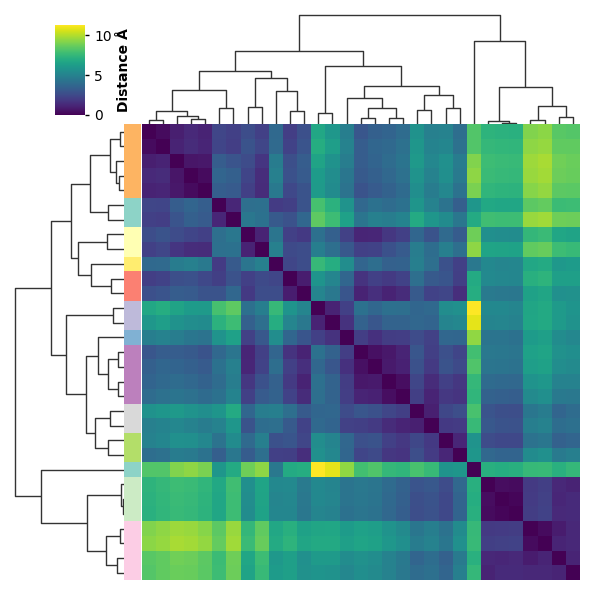

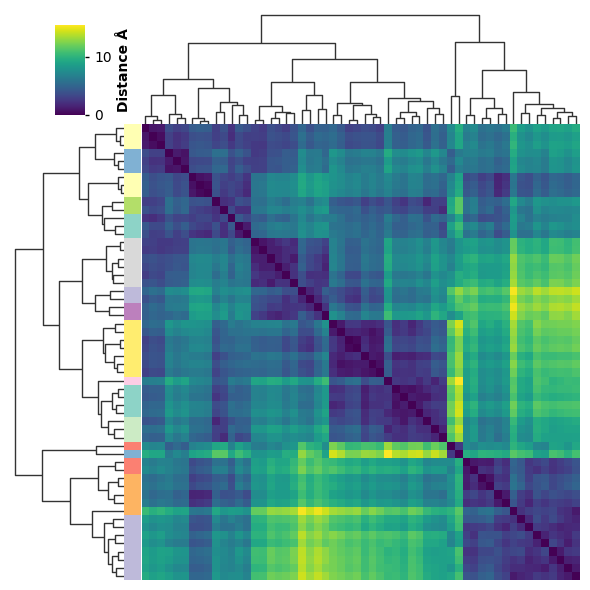

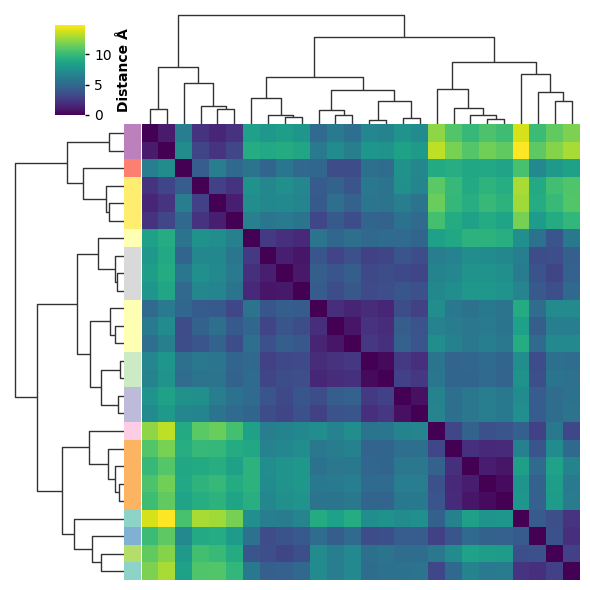

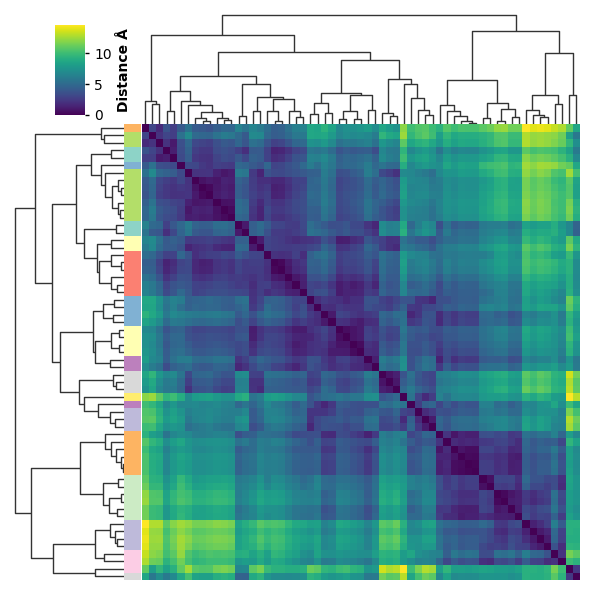

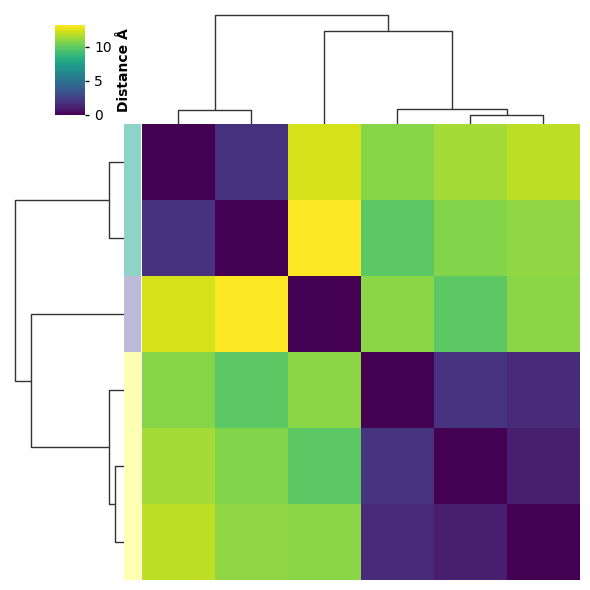

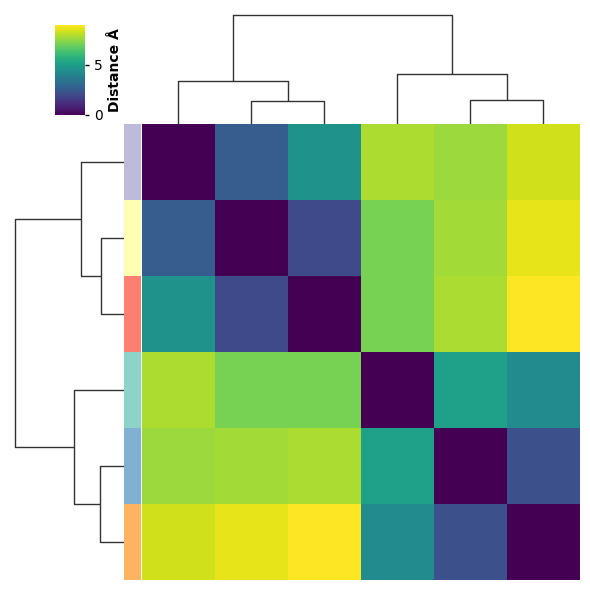

In [ ]:
concensus,links=compute_concensus_pharmacophore(p4_table,save_data_per_descriptor=True,out_folder='../Data/pharmacophores/concensus_model/',cmap_plots="viridis", h_dist=0.2)

In [8]:
concensus['cluster'] = concensus['cluster'].astype(int)
concensus


,name,cluster,x,y,z,radius,color,weight,balance
1,Aromatic,1,-5.694370,-0.160969,-12.919395,0.5,purple,5.0,0.212598
2,Aromatic,2,-7.527650,1.449167,-11.485933,0.5,purple,2.0,0.031496
3,Aromatic,3,-3.740333,0.308250,-12.655500,0.5,purple,2.0,0.062992
4,Aromatic,4,-4.486948,1.436667,-10.936589,0.5,purple,2.0,0.070866
5,Aromatic,5,-6.292400,2.493200,-9.516000,0.5,purple,1.0,0.007874
...,...,...,...,...,...,...,...,...,...
72,PositiveIon,2,-2.762667,0.589000,-11.665333,0.5,blue,1.0,0.166667
73,PositiveIon,3,-5.872000,2.530000,-9.035000,0.5,blue,1.0,0.166667
74,PositiveIon,4,0.751000,4.920000,-6.193000,0.5,blue,1.0,0.166667
75,PositiveIon,5,0.611000,7.087000,-6.514000,0.5,blue,1.0,0.166667


In [9]:
#remove all rows where weight < 2
concensus_test = concensus[concensus['weight'] >= 2]
len(concensus_test)

49

In [10]:
save_pharmacophore_to_pymol(concensus,out_file='../Data/pharmacophores/concensus_model/pharmacophore_concensus.pse',
select='concensus')
save_pharmacophore_to_json(concensus,out_file='../Data/pharmacophores/concensus_model/pharmacophore_concensus.json')
save_pharmacophore_to_json(concensus_test,out_file='../Data/pharmacophores/concensus_model/pharmacophore_concensus_test.json')

manually make Weight dependant coloring

In [11]:
# find max weight value for each name
max_weight = concensus.groupby('name')['weight'].max()
print(max_weight)

weighting_list = concensus
# add column frequency to concensus where weight / max_weight
weighting_list['frequency'] = weighting_list['weight'] / max_weight[weighting_list['name']].values

# Normalize the frequency to range from 0 to 1
min_freq = weighting_list['frequency'].min()
max_freq = weighting_list['frequency'].max()
weighting_list['normalized_frequency'] = (weighting_list['frequency'] - min_freq) / (max_freq - min_freq)
weighting_list

name
Aromatic            5.0
HydrogenAcceptor    8.0
HydrogenDonor       4.0
Hydrophobic         7.0
NegativeIon         3.0
PositiveIon         1.0
Name: weight, dtype: float64


,name,cluster,x,y,z,radius,color,weight,balance,frequency,normalized_frequency
1,Aromatic,1,-5.694370,-0.160969,-12.919395,0.5,purple,5.0,0.212598,1.0,1.000000
2,Aromatic,2,-7.527650,1.449167,-11.485933,0.5,purple,2.0,0.031496,0.4,0.314286
3,Aromatic,3,-3.740333,0.308250,-12.655500,0.5,purple,2.0,0.062992,0.4,0.314286
4,Aromatic,4,-4.486948,1.436667,-10.936589,0.5,purple,2.0,0.070866,0.4,0.314286
5,Aromatic,5,-6.292400,2.493200,-9.516000,0.5,purple,1.0,0.007874,0.2,0.085714
...,...,...,...,...,...,...,...,...,...,...,...
72,PositiveIon,2,-2.762667,0.589000,-11.665333,0.5,blue,1.0,0.166667,1.0,1.000000
73,PositiveIon,3,-5.872000,2.530000,-9.035000,0.5,blue,1.0,0.166667,1.0,1.000000
74,PositiveIon,4,0.751000,4.920000,-6.193000,0.5,blue,1.0,0.166667,1.0,1.000000
75,PositiveIon,5,0.611000,7.087000,-6.514000,0.5,blue,1.0,0.166667,1.0,1.000000


In [12]:
# print the top 4 best clusters based on normalized_frequency for each name
top_indices = weighting_list.groupby('name')['normalized_frequency'].nlargest(4).reset_index(level=0, drop=True).index
top_clusters = weighting_list.loc[top_indices]
top_clusters = top_clusters.sort_values(by='name')
top_clusters

,name,cluster,x,y,z,radius,color,weight,balance,frequency,normalized_frequency
1,Aromatic,1,-5.694370,-0.160969,-12.919395,0.500000,purple,5.0,0.212598,1.000000,1.000000
7,Aromatic,7,-3.202450,1.627883,-11.181842,0.500000,purple,4.0,0.188976,0.800000,0.771429
12,Aromatic,12,-0.834970,5.150841,-7.799182,0.500000,purple,4.0,0.173228,0.800000,0.771429
11,Aromatic,11,-1.481656,4.179200,-8.653989,0.500000,purple,3.0,0.118110,0.600000,0.542857
30,HydrogenAcceptor,17,0.668474,6.693842,-5.428895,1.011654,orange,8.0,0.121795,1.000000,1.000000
22,HydrogenAcceptor,9,-2.957735,-0.269794,-13.223471,0.851909,orange,7.0,0.217949,0.875000,0.857143
19,HydrogenAcceptor,6,-7.246600,1.367400,-10.713000,0.766490,orange,6.0,0.128205,0.750000,0.714286
23,HydrogenAcceptor,10,-0.680650,-0.072800,-12.917500,0.500000,orange,4.0,0.128205,0.500000,0.428571
35,HydrogenDonor,4,-0.112667,1.772333,-11.042000,0.500000,yellow,3.0,0.180000,0.750000,0.714286
37,HydrogenDonor,6,-1.588286,4.404429,-8.754000,0.588817,yellow,3.0,0.140000,0.750000,0.714286


In [13]:
import pandas as pd
import random

# Assuming top_clusters is already defined

# Feature types to consider
FEATURES = ['HydrogenAcceptor', 'HydrogenDonor', 'Aromatic', 'Hydrophobic']
MAX_FEATURES = {
    'HydrogenAcceptor': 3,   # no cap
    'HydrogenDonor': 3,      # no cap
    'Aromatic': 1,
    'Hydrophobic': 1
}
MIN_COUNTS = {
    'HydrogenAcceptor': 1,
    'HydrogenDonor': 1,
    'Aromatic': 1,
    'Hydrophobic': 1
}

combinations = []

for _ in range(5):
    valid = False
    while not valid:
        selected = {}
        count = 0
        for f in FEATURES:
            max_count = MAX_FEATURES[f] or (6 - count)
            min_count = MIN_COUNTS[f]
            max_possible = min(max_count if max_count else 6 - count, len(top_clusters[top_clusters['name'] == f]))
            if max_possible < min_count:
                break  # Not enough features of this type to satisfy constraints
            n = random.randint(min_count, max_possible)
            chosen = top_clusters[top_clusters['name'] == f].sample(n=n, replace=False)
            selected[f] = chosen['cluster'].tolist()
            count += n
        if 5 <= count <= 6:
            valid = True
            combinations.append(selected)

# Convert to DataFrame for output
combo_df = pd.DataFrame(combinations)
print(combo_df)


  HydrogenAcceptor HydrogenDonor Aromatic Hydrophobic
0      [10, 6, 17]           [6]     [11]        [17]
1         [17, 10]        [4, 9]     [11]        [17]
2           [9, 6]           [2]      [1]        [10]
3          [10, 9]           [9]     [12]        [17]
4              [9]     [6, 2, 9]     [12]         [4]


In [14]:
# remove frequecy and normalized_frequency columns
concensus = concensus.drop(columns=['frequency', 'normalized_frequency'])
concensus

,name,cluster,x,y,z,radius,color,weight,balance
1,Aromatic,1,-5.694370,-0.160969,-12.919395,0.5,purple,5.0,0.212598
2,Aromatic,2,-7.527650,1.449167,-11.485933,0.5,purple,2.0,0.031496
3,Aromatic,3,-3.740333,0.308250,-12.655500,0.5,purple,2.0,0.062992
4,Aromatic,4,-4.486948,1.436667,-10.936589,0.5,purple,2.0,0.070866
5,Aromatic,5,-6.292400,2.493200,-9.516000,0.5,purple,1.0,0.007874
...,...,...,...,...,...,...,...,...,...
72,PositiveIon,2,-2.762667,0.589000,-11.665333,0.5,blue,1.0,0.166667
73,PositiveIon,3,-5.872000,2.530000,-9.035000,0.5,blue,1.0,0.166667
74,PositiveIon,4,0.751000,4.920000,-6.193000,0.5,blue,1.0,0.166667
75,PositiveIon,5,0.611000,7.087000,-6.514000,0.5,blue,1.0,0.166667


In [ ]:
# Define filters as a dictionary: feature name → list of clusters
filters = {
    'Aromatic': [1,12], #purple
    'Hydrophobic': [10], #green
    'HydrogenAcceptor': [9,6], #orange
    'HydrogenDonor': [2] #yellow
}

# Build a set of valid (name, cluster) pairs
valid_pairs = set()
for name, clusters in filters.items():
    for cluster in clusters:
        valid_pairs.add((name, cluster))

# Filter rows matching any of the (name, cluster) pairs
submodel_df = concensus[[ (row['name'], row['cluster']) in valid_pairs for _, row in concensus.iterrows() ]]

save_pharmacophore_to_json(submodel_df,out_file='../Data/pharmacophores/sub_models/Submodel_4.json')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(3, 1))
fig.subplots_adjust(bottom=0.5)

# Create a colormap from white to purple using RGB values
cmap = mpl.colors.LinearSegmentedColormap.from_list('white_blue', ['white', (0, 0, 1)])

# Create a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

# Set the ticks to only 0 and 100
cb1.set_ticks([0,1])

# Remove other ticks and labels
cb1.ax.tick_params(axis='x', which='both', length=0, labelsize=16)  # Enlarge and bold tick numbers

# Enlarge and bold the label
cb1.set_label('Weight', fontsize=12, fontweight='bold',labelpad=-12)

# Remove background color
cb1.ax.set_facecolor('none')

# Save the figure to a PNG file
plt.savefig('../Results/color keys/color_key_blue.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.show()


In [16]:
from pymol import cmd
import pandas as pd

# Define subsets of the consensus DataFrame
subsets = {
    "Aromatic": weighting_list[weighting_list['name'] == 'Aromatic'],
    "Hydrophobic": weighting_list[weighting_list['name'] == 'Hydrophobic'],
    "HydrogenAcceptor": weighting_list[weighting_list['name'] == 'HydrogenAcceptor'],
    "HydrogenDonor": weighting_list[weighting_list['name'] == 'HydrogenDonor'],
    "PositiveIon": weighting_list[weighting_list['name'] == 'PositiveIon'],
    "NegativeIon": weighting_list[weighting_list['name'] == 'NegativeIon']
}

# Iterate over each subset
for subset_name, subset_data in subsets.items():
    cmd.reinitialize()  # Reset PyMOL session

    # Add pseudoatoms for the current subset
    for index, row in subset_data.iterrows():
        name = row['cluster']
        x, y, z = row['x'], row['y'], row['z']
        radius = row['radius']
        b = row['normalized_frequency']
        color = row['color']
        atom_name = f"{name}_{index}"
        cmd.pseudoatom(object=atom_name, pos=[x, y, z], vdw=radius, b=b)
        cmd.label(atom_name, f'"{name}"')

    # Apply coloring based on B-factor
    cmd.spectrum("b", palette=f"white {color}", selection="*")

    # Group everything and save the PyMOL session
    cmd.group(subset_name, '*')
    cmd.center('all')
    cmd.show('spheres')
    cmd.save(f'../Data/pharmacophores/concensus_model/{subset_name}_clusters_by_weight.pse')